> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate the TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.


### Questions we will answer during this analysis

<ul>
    <li>Was a better rating attribuated to movies with higher vote counts?</li>
    <li>What were the most known produced genres in year 2000 compared to year 2015?</li>
    <li>Over time how did the amount of produced films changed?</li>
    <li>Which genres are most popular from year to year?</li>
    <li>Movies with high revenues have what kind of properties?</li>
    
</ul>

In [2]:
# Use this cell to set up import statements for all of the packages that you

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

"""Changing scientific numbers to numeric numbers"""
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


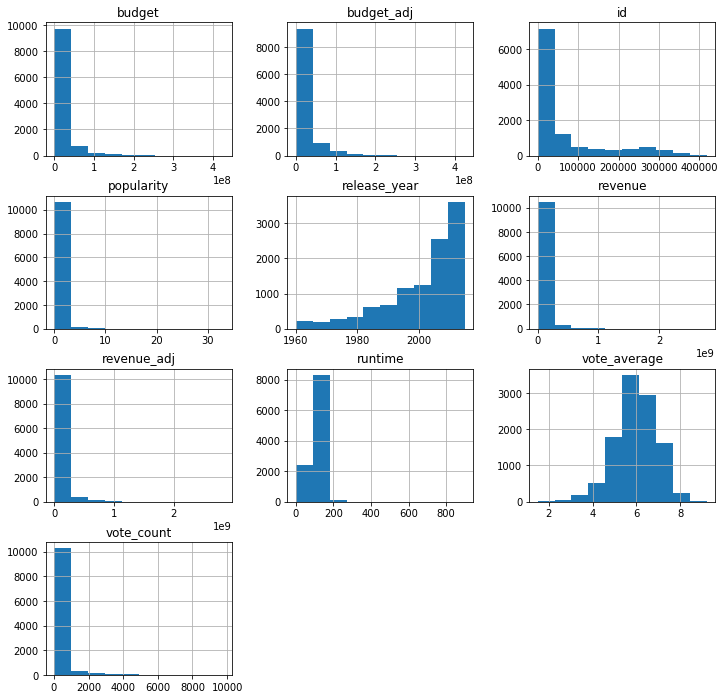

In [5]:
df.hist(figsize=(12,12));

In [6]:
df.info(),
print('-------------')
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning for unwanted or incorrect data elements

### My Observations
We have many coloumns that depict a problem. Some rows tend to contain several values, which are seperated by an "|". There's a need for cleaning in the first place in order to provide a proper dataset for the purpose analysis. The rows containing such values are:

- genres
- production_companies
- cast    
- director
- keywords

furthermore, there are columns in the dataset, which are not necessary for the purpose analysis and therefore will be removed. This includes:

- overview
- release_date
- tagline
- imdb_id
- homepage


### Taking care of NAN and 0
df.info( ) revealed that most columns with important content for the analysis, such us revenue, release_year, etc. have a big amount of available data for the analysis. However, the .describe() method, as well as the histogramms, indicate that many columns, especially budget and revenue, contain many "0" in their columns. In order to provide a proper analysis, the columns "budget_adj", "revenue_adj", "budget", "revenue" and "runtime" will change its "0" values into "nan" and the respective colums will be dropped for the analysis.


In this section, "0" will be replaced with nan-Values and will be dropped. Then, the rows with several values will be seperated in single columns containing only one value. This is needed in order to perform a proper analysis. Afterwards, unwanted rows for the analysis will be dropped, before the author will perform general data cleaning action as dropping duplicated lines, correct data types, check duplicated entries in some selected columns.

In [7]:
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)

df.dropna(axis=0, inplace=True)

In [8]:
"""Dividing different columns with multiple values, split by an '|', into as many columns as desired"""

df_k = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_g = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_p = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))
df_c = (df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
df_d = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))

#Verifying that df_c if split was initiated as desired
df_c.head()

,cast_1,cast_2,cast_3,cast_4,cast_5
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [9]:
"""Combining the divided columns to the initial dataframe and dropping unwanted columns for the analysis"""

df = df.join([df_c, df_d, df_k, df_g, df_p])
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [10]:
"""Verifying if all rows contain the desired data type"""
df.dtypes

id                          int64
popularity                float64
budget                    float64
revenue                   float64
original_title             object
runtime                   float64
vote_count                  int64
vote_average              float64
release_year                int64
budget_adj                float64
revenue_adj               float64
cast_1                     object
cast_2                     object
cast_3                     object
cast_4                     object
cast_5                     object
director_1                 object
director_2                 object
director_3                 object
director_4                 object
director_5                 object
director_6                 object
keywords_1                 object
keywords_2                 object
keywords_3                 object
keywords_4                 object
keywords_5                 object
genres_1                   object
genres_2                   object
genres_3      

In [11]:
"""Verifying the number of duplicates"""
df.duplicated().sum()

0

#### Note
In general, the data looks quiet prepared for the analysis, no duplicates have been found, columns containing multiple values have been seperated and data types look ready for analysis. Next, the author will use masks (or queries) to  have a deeper look, if some double entries are in specific columns.

In [12]:
df['original_title'].value_counts().head()


Halloween               2
The Thing               2
The Three Musketeers    2
Wanted                  2
Clash of the Titans     2
Name: original_title, dtype: int64

In [13]:
print('Dataframe contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Dataframe contains 1287 rows and 37 columns


#### Note
The Answer shows that despite having a same movie title, the movies differ in other columns. Hence, the author implies that there are movies with the same title but different content. Therefore, no more rows need to be dropped. The drop of all rows containing relevant nan-values has led to a big decrease in the dataframe. Now, only 1287 movies will be used for the analysis. This will influence the outcome of the research questions.

Because the value_counts() in the title column showed that there may be double entries of movie names, a function "check_double_title" was defined to have a deeper look in the rows with same movie title.

In [14]:
"""Verifying the columns for dubplicated original_title entries"""
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]
limit_4_title

limit_4_id = df['original_title'].value_counts().index.tolist()

def check_double_title(names):
    for limit in limit_4_title:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print("____________________________________________________________")
        
check_double_title(limit_4_title)

         id  popularity      budget     revenue original_title
7483   2082        0.81 15000000.00 80253908.00      Halloween
10759   948        1.20   300000.00 70000000.00      Halloween
____________________________________________________________
         id  popularity      budget     revenue original_title
3472  60935        1.01 35000000.00 28128670.00      The Thing
8890   1091        2.36 10000000.00 13782838.00      The Thing
____________________________________________________________
          id  popularity      budget      revenue        original_title
3425   52451        1.41 75000000.00 132274484.00  The Three Musketeers
10251  10057        0.79 30000000.00  53898845.00  The Three Musketeers
____________________________________________________________
         id  popularity      budget      revenue original_title
1733  22717        0.28       75.00       134.00         Wanted
2893   8909        1.98 75000000.00 258270008.00         Wanted
_______________________________

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Was a better rating attribuated to movies with higher vote counts?

In [16]:
#Slice DataFrame to get 2 columns 'vote_count' and 'vote_average'
df_vote = df.loc[:, 'vote_count' : 'vote_average']
#To compare results only entries are considered with more than 2000 votes
df_vote_2000 = df_vote[df_vote['vote_count'] > 2000]

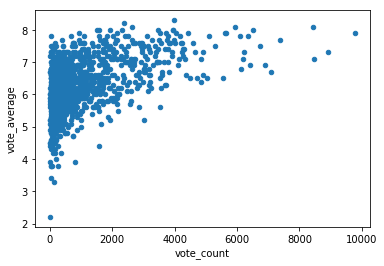

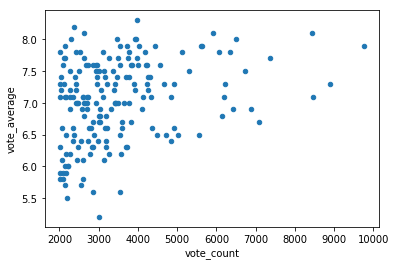

In [19]:
df_vote.plot(x='vote_count', y='vote_average', kind='scatter');
df_vote_2000.plot(x='vote_count', y='vote_average', kind='scatter');

In [20]:
df_vote.corr()

,vote_count,vote_average
vote_count,1.00,0.46
vote_average,0.46,1.00


In [21]:
df_vote_2000.corr()

,vote_count,vote_average
vote_count,1.00,0.31
vote_average,0.31,1.00


> From the visualizations above, we clearly see that the answer to our question is most probably ***NO***. 
This is because we can easily visualize that when we have a rating, generally we have a low vote count.

### Research Question 2: What were the most known produced genres in year 2000 compared to year 2015?

In [23]:
# Selecting genres columns for the analysis of the original data frame
df_genres = df.loc[:, 'genres_1': 'genres_5' ]
# Adding release year to df_genres
df_genres_dates = df_genres.join(df['release_year'])

In [24]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
#Creating a Mask for the release_year 2015
df_2015 = df_genres_dates[df_genres_dates['release_year'] == 2015].copy()
#drop release_year
df_2015.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2015 = df_2015.stack().value_counts()


In [25]:
#Creating a Mask for the release_year 2000
df_2000 = df_genres_dates[df_genres_dates['release_year'] == 2000].copy()
#drop release_year
df_2000.drop('release_year',axis=1, inplace=True)
#value_counts across columns
df_2000 = df_2000.stack().value_counts()

In [26]:
#Comparing index of both dataframes
df_2015.index.sort_values(),df_2000.index.sort_values()

#Adjusting columns to have a match in columns
df_2000['Animation'] = 0
df_2000['Crime'] = 0
df_2000['History'] = 0
df_2000['Horror'] = 0
df_2000['Music'] = 0
df_2000['Western'] = 0

#Updating DataFrames, sort it by index
df_2015 = df_2015.sort_index()
df_2000 = df_2000.sort_index()

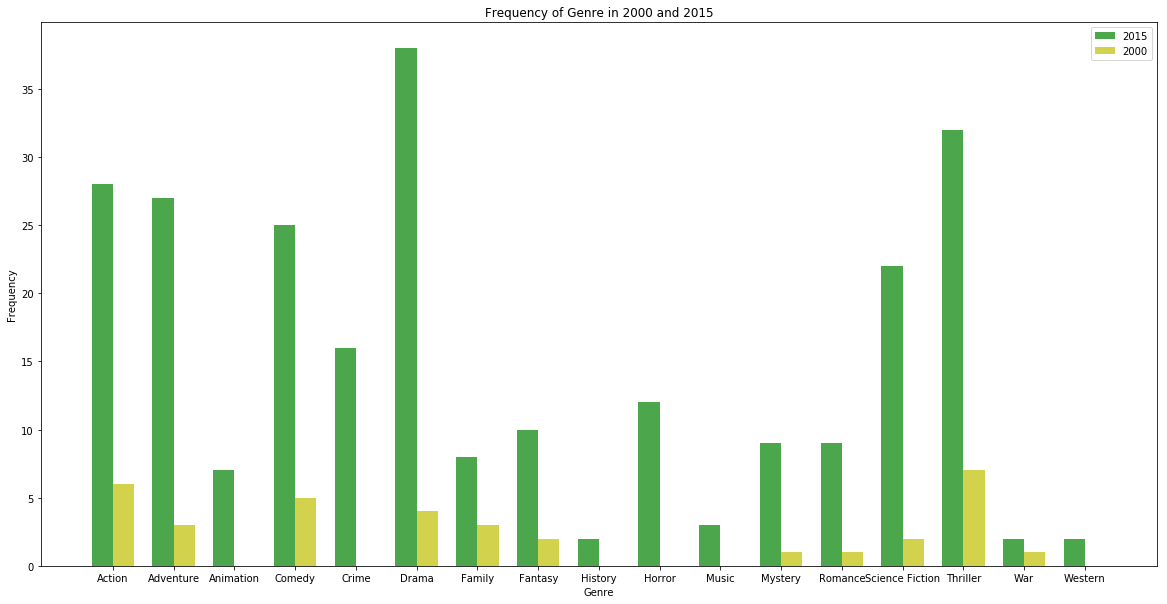

In [28]:
'''Generating a plot with a bar chart with 2 bars'''
labels = df_2000.index.sort_values()
ind = np.arange(len(df_2015))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, df_2015, width, color='g', alpha=.7, label='2015')
white_bars = plt.bar(ind + width, df_2000, width, color='y', alpha=.7, label='2000')

#chart title and labels
plt.ylabel('Frequency')
plt.xlabel('Genre')
plt.title('Frequency of Genre in 2000 and 2015')
locations = ind + width / 2  # xtick locations
labels = labels # xtick labels
plt.xticks(locations, labels)
plt.rcParams["figure.figsize"] = (50,25)
# legend
plt.legend();

> We clearly see that it is 2015 that wins because from our chart we can see that the genres produced in 2015 were far more popular than those of the year 2000. This can be explained by the constant population growth.

### Question 4: Which genres are most popular from year to year?

In [30]:
years = df_genres_dates['release_year'].unique() #creates an array of years mentioned in release year 
most_common = [] #creates a list of tuples for most common genres in specific years

#for loop to create most_common list
for year in years:
    #creates df filtered by every year mentioned in years
    a = df_genres_dates[df_genres_dates['release_year'] == year] 
    #drops columns "release_year to perferm stack value count in next line
    b = a.drop(['release_year'], axis = 1)
    #performs value count trough genres_1 - genres_5 and stores the index of maximum count
    c = b.stack().value_counts().idxmax() 

    #creates a masked DataFrame for respective years
    x = df[df['release_year'] == year]
    #creates the mean of vote_average and stores the index of maximum value
    y = x.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c == y:
        z = 'Equal'
    else:
        z = 'Not equal'
        #appends year with value count trough genres_1 - genres_5, the highest average vote_average and indicates if the resulting columns match
    most_common.append((year, c, y, z))

#creates df for list of tuples named most_common
df_most_popular = pd.DataFrame(most_common, columns=['release_year', 'popular_produced_genre', 'popular_voted_gerne', 'is_equal']).sort_values('release_year').reset_index().drop(['index'], axis=1)
df_most_popular

,release_year,popular_produced_genre,popular_voted_gerne,is_equal
0,1961,Family,Comedy,Not equal
1,1962,Action,Adventure,Not equal
2,1963,Action,Action,Equal
3,1964,Action,Adventure,Not equal
4,1965,Action,Adventure,Not equal
5,1967,Action,Action,Equal
6,1969,Action,Adventure,Not equal
7,1971,Thriller,Action,Not equal
8,1972,Drama,Drama,Equal
9,1973,Thriller,Drama,Not equal


### Questions 3: Over time how did the amount of produced films changed?

In [31]:
amount_of_movies = [] #creates a list of tuples for amount of movies

#for loop to create amount_of_movies, years was previously defined
for year in years:
    d = df_genres_dates[df_genres_dates['release_year'] == year] #creates df filtered by every year mentioned in years
    e = len(d.index) #determines the number of rows 
    amount_of_movies.append((year, e)) #appends year with respective number of rows
    
#creates df for list of tuples amount_of_movies
df_amount_of_movies = pd.DataFrame(amount_of_movies, columns=['release_year', 'amount_of_mvies']).sort_values('release_year').reset_index().drop(['index'], axis=1)

,release_year,amount_of_mvies
0,1961,1
1,1962,1
2,1963,1
3,1964,2
4,1965,1
5,1967,1
6,1969,1
7,1971,4
8,1972,1
9,1973,2


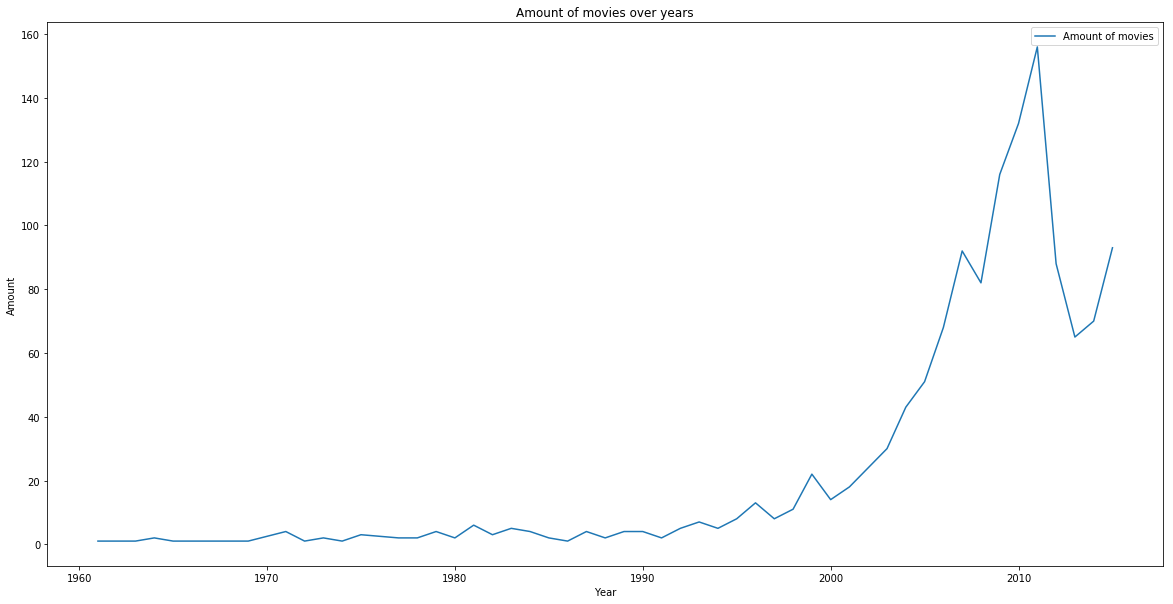

In [32]:
df_amount_of_movies.plot(x='release_year', y='amount_of_mvies', kind='line', figsize=(20,10), title="Amount of movies over years", label="Amount of movies", )
plt.xlabel('Year')
plt.ylabel('Amount');
df_amount_of_movies

### Question 5 : Movies with high revenues have what kind of properties?

In [33]:
# Generate a copy of the initial DataFrame
df_revenue = df

In [34]:
#Performing basic statistic in order to create 4 classifications of the revenue_adj
df_revenue['revenue_adj'].describe()


count         1287.00
mean     199177499.23
std      296851462.45
min             43.00
25%       27648902.20
50%       86747695.58
75%      235117806.64
max     2827123750.41
Name: revenue_adj, dtype: float64

In [35]:
#Bin_edges correspond to min - max entries in previous cell. Quantiles are lables by bin_names.
#new column 'revenue_level' is created to classify columns based on revenues

bin_edges = [2.37,10465848.09,43956661.16,131648235.91,2827123750.41]
bin_names = ['very low' ,'low' ,'medium' ,'high' ] 
df_revenue['revenue_level'] = pd.cut(df_revenue['revenue_adj'], bin_edges, labels=bin_names)

In [36]:
#list of revenue_levels classification is created for loop in next cell
df_revenue['revenue_level'].unique()
revenue_levels = df_revenue['revenue_level'].unique().tolist()
del revenue_levels[-1]

In [37]:
#nested dictionary is created with 8 attributes based on revenue_levels

movie_data = {}

for level in revenue_levels:
    
    #stack.value_counts seciton
    grouped_data = df_revenue[df_revenue['revenue_level'] == level]
        #director
    director = grouped_data.loc[:, 'director_1': 'director_6']
    frequent_director = director.stack().value_counts().idxmax()
        #cast
    cast = grouped_data.loc[:, 'cast_1': 'cast_5']
    frequent_cast = cast.stack().value_counts().idxmax()
        #genres
    genres = grouped_data.loc[:, 'genres_1': 'genres_5']
    frequent_genres = genres.stack().value_counts().idxmax()
        #production companies
    production = grouped_data.loc[:, 'production_companies_1': 'production_companies_5']
    frequent_production = production.stack().value_counts().idxmax()
        #release_year
    release_year = grouped_data['release_year'].value_counts().idxmax()
    
    #average section
    avg_duration = grouped_data['runtime'].mean()
    avg_budget = grouped_data['budget_adj'].mean()
    avg_vote = grouped_data['vote_average'].mean()
    
    #creating nested dictionary
    movie_data[level] = {'avg_duration' : avg_duration, 
                         'frequent_director' : frequent_director, 
                         'avg_budget' : avg_budget, 
                         'avg_vote' : avg_vote,
                        'frequent_cast' : frequent_cast,
                        'frequent_genres' : frequent_genres,
                        'release_year' : release_year,
                        'frequent_production_companies' : frequent_production}

In [38]:
#https://stackoverflow.com/questions/13575090/construct-pandas-dataframe-from-items-in-nested-dictionaryuser_ids = []
#transforming nested dictionary into dataframe

movie_classes = []
frames = []

for movie_class, d in movie_data.items():
    movie_classes.append(movie_class)
    frames.append(pd.DataFrame.from_dict(d, orient='index'))
    
properties = pd.concat(frames, keys=movie_classes)  

properties.columns = ['values']
properties

values
high     avg_duration                                 117.54
         frequent_director                  Steven Spielberg
         avg_budget                              95442930.57
         avg_vote                                       6.52
         frequent_cast                     Samuel L. Jackson
         frequent_genres                              Action
         release_year                                   2011
         frequent_production_companies    Universal Pictures
low      avg_duration                                 105.01
         frequent_director                    John Carpenter
         avg_budget                              25129745.42
         avg_vote                                       6.17
         frequent_cast                         Colin Farrell
         frequent_genres                               Drama
         release_year                                   2011
         frequent_production_companies    Universal Pictures
medium   avg_duration                                 107.83
         frequent_director                     Adam Shankman
         avg_budget                              39912951.34
         avg_vote                                       6.17
         frequent_cast                         Jason Bateman
         frequent_genres                               Drama
         release_year                                   2011
         frequent_production_companies          Warner Bros.
very low avg_duration                                 102.02
         frequent_director              Francis Ford Coppola
         avg_budget                              10380165.24
         avg_vote                                       5.99
         frequent_cast                            Ellen Page
         frequent_genres                               Drama
         release_year                                   2010
         frequent_production_companies             Lionsgate

#### Note
> The summary is clearly shown in the figure above with all the required statistics.

<a id='conclusions'></a>
## Conclusions

The first question; Was a better rating attribuated to movies with higher vote counts? it was clear that movies with higher ratings were fewer than those with smaller ratings. This can be explained by the fact that the good movies are really scarce.

The second question; What were the most known produced genres in year 2000 compared to year 2015? It was astonishing that all the genre produced in 2015 were all more popular than those produce in 2000. This is due to may be a considerable increase in population.

The third Question; Over time how did the amount of produced films changed? From the early 1960 to the year 2000, the production was fairly constant but as from 2000 to 2010 there was a tremendous increase in the production of films. This was mainly due to to the emergence of new movie genres and population increase that demanded for more. After the year 2010, this number started decreasing before starting to rise again as from 2015.

The fourth Question; Which genres are most popular from year to year? In general, in the recent years it was mostly the drama genre that was the most known and popular. In the late ninetees it was the action genre. The Documentary also is not tobe left out.

The fifth Question; Movies with high revenues have what kind of properties? We observe a common path with these movies, they have the same main caracters mostly. The popularity of a movie is influenced by the actors that play in it.

**All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data**


In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0